In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv


# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
#this is logistic regression model to predict hert diseses
#importing all the lib for the same

# Importing Data

In [4]:
df = pd.read_csv('/content/framingham.csv')
#data read

# Data Processing

In [5]:
df.head()
#return kreg n rows if not defined default 5 hoga


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
df.describe()
#summarizes

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
df.info()

#pura info of kitna data hai in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


# Checking for discrepancy in data

In [30]:
df.isna()
#yh pe bta rhe ki kitna missing value hai pura in no. verna if only isna it returns boolean

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4233,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4234,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
total_null_values = df.isnull().sum().sort_values(ascending = False)
#missing vleue ko sort kro highest t the top
percentage = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
#find out the percentage of the same
print("Total values present are ",df.shape[0])
#print out in no.
total_missing_data = (pd.concat([total_null_values,percentage.round(2)],axis=1,keys=['Total Missing','In precentage']))
#print out in percentage
total_missing_data

Total values present are  4238


,Total Missing,In precentage
glucose,388,9.16
education,105,2.48
BPMeds,53,1.25
totChol,50,1.18
cigsPerDay,29,0.68
BMI,19,0.45
heartRate,1,0.02
male,0,0.00
age,0,0.00
currentSmoker,0,0.00


In [10]:
#Since, only a few rows have null values in them, we are only removing those rows from the dataset.
df = df.dropna(subset=['heartRate','BMI','cigsPerDay','totChol','BPMeds'])

In [11]:
total_null_values = df.isnull().sum().sort_values(ascending = False)
percentage = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total values present are ",df.shape[0])
total_missing_data = (pd.concat([total_null_values,percentage.round(2)],axis=1,keys=['Total Missing','In precentage']))
total_missing_data

Total values present are  4088


,Total Missing,In precentage
glucose,339,8.29
education,101,2.47
male,0,0.00
age,0,0.00
currentSmoker,0,0.00
cigsPerDay,0,0.00
BPMeds,0,0.00
prevalentStroke,0,0.00
prevalentHyp,0,0.00
diabetes,0,0.00


Since, 'glucose' and 'education' columns had a significant amount of null values, so we replaced them with the mean of values for their respective columns

In [12]:
df['glucose'].fillna(value = df['glucose'].mean(),inplace=True)

In [13]:
df['education'].fillna(value = df['education'].mean(),inplace=True)
#replacing the null vlues with the mean of the coloumn

## After removing NULL values

In [14]:
total_null_values = df.isnull().sum().sort_values(ascending = False)
percentage = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total values present are ",df.shape[0])
total_missing_data = (pd.concat([total_null_values,percentage.round(2)],axis=1,keys=['Total Missing','In precentage']))
total_missing_data
#no missing data now

Total values present are  4088


,Total Missing,In precentage
male,0,0.0
age,0,0.0
education,0,0.0
currentSmoker,0,0.0
cigsPerDay,0,0.0
BPMeds,0,0.0
prevalentStroke,0,0.0
prevalentHyp,0,0.0
diabetes,0,0.0
totChol,0,0.0


# Analysis of Data

In [15]:
#Checking the unique values present in the target varibale
df['TenYearCHD'].value_counts()

0    3477
1     611
Name: TenYearCHD, dtype: int64

In [16]:
correlation = df.corr()

In [17]:
print(correlation['TenYearCHD'])

male               0.096060
age                0.226849
education         -0.053270
currentSmoker      0.025360
cigsPerDay         0.063060
BPMeds             0.085618
prevalentStroke    0.044186
prevalentHyp       0.173806
diabetes           0.089132
totChol            0.080676
sysBP              0.214921
diaBP              0.147684
BMI                0.076643
heartRate          0.025715
glucose            0.119826
TenYearCHD         1.000000
Name: TenYearCHD, dtype: float64


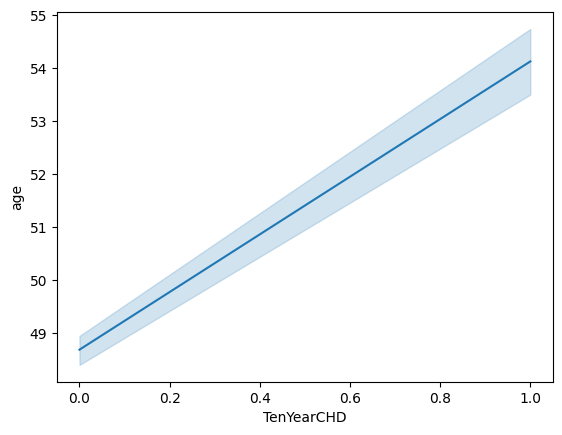

In [18]:
#Visualising relation between age and heartRate.
sns.lineplot(x='TenYearCHD',y='age',data=df)
plt.show()

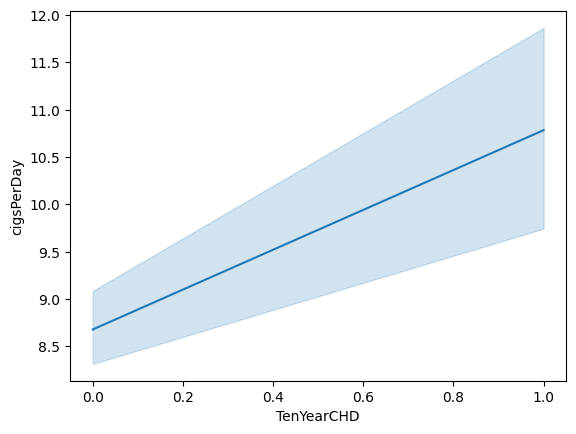

In [19]:
#Visualising relation between age and ciggarates per day.
sns.lineplot(x='TenYearCHD',y='cigsPerDay',data=df)
plt.show()
#plotting grphs of ten yers nd cigs 

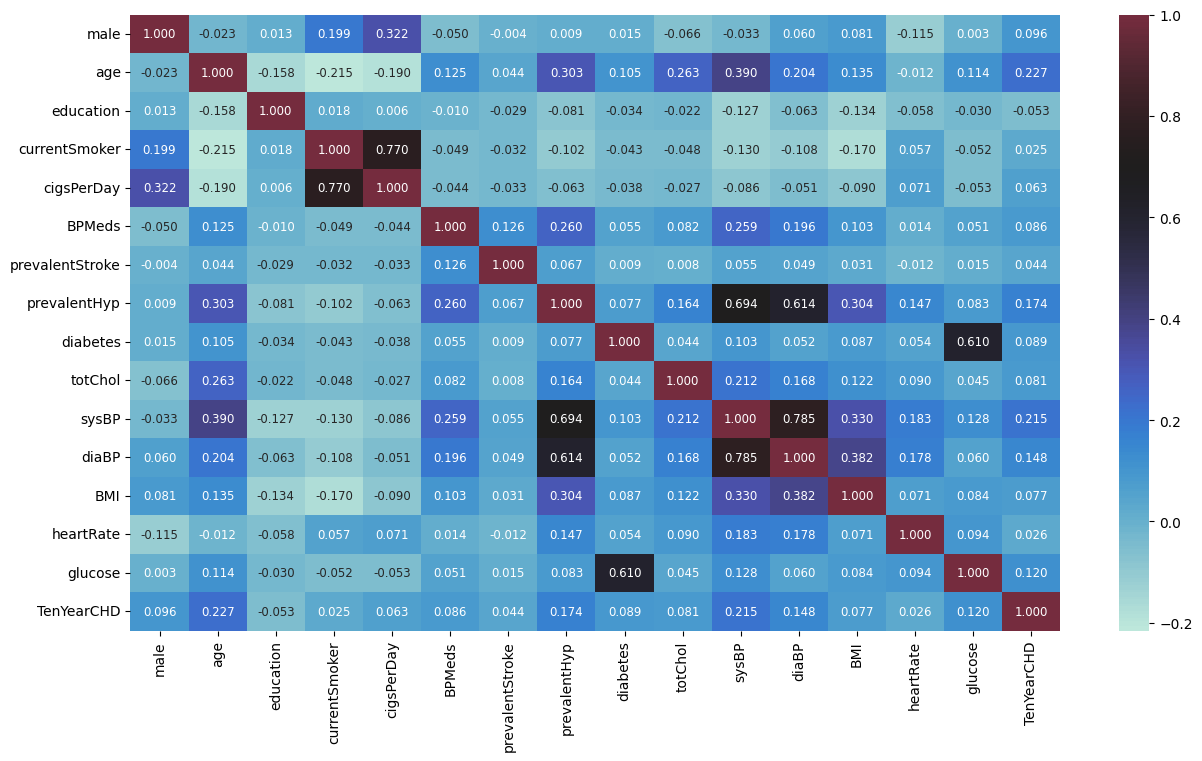

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation,cbar=True,fmt='.3f',annot=True,annot_kws={'size':8.5},center=0.7)
plt.show()
#plotting het mp of the coreeltion nd row of male and age

# Logistic Regression Model

In [21]:
#rSplitting the dependent and independent variables.
x = df.drop("TenYearCHD",axis=1)
y = df['TenYearCHD']

In [22]:
x #checking the features

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.000000
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,81.883169


In [23]:
y.shape #checking the output variable
#finding out the dimension of the dt

(4088,)

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
#scikit lenrn of model selection it splits your dtd in to trining nd testing , 0.2 for testing res ll dtd for trining

In [ ]:
y_train
#trinng the dtd

2127    0
2560    0
2929    0
2142    0
1878    1
       ..
1167    0
1337    0
887     0
3640    0
3296    0
Name: TenYearCHD, Length: 3270, dtype: int64

In [25]:
model = LogisticRegression().fit(x_train,y_train)
#defining wht dta to train in losgistic regression

# Testing on Test data

In [26]:
y_predict = model.predict(x_test)
print(y_predict)
#given a trained model, predict the label of a new set of data.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [27]:
accuracy_score(y_predict,y_test)*100
#jo bhi score y usko 00 se multiply kr do
#here 85 percent mens the ml model of logistic regression is 85 percent right in predicting the hert disese from the given dt set

85.33007334963325